# Citi Bike Trip Analysis


Citi Bike is a bike-sharing service in New York City that allows for quick and inexpensive bike excursions. They publish information on such travels on a regular basis, including beginning and terminating stations, starting and ending times, trip duration, and a few other characteristics.

Let's have a peek at the numbers

In [93]:
#importing libraries required
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import numpy as np
import mpl_toolkits
import warnings
warnings.filterwarnings('ignore')

In [94]:
#Importing data into a DataFrame
citi_data = pd.read_csv('201808-citibike-tripdata.csv')
citi_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


We have some null values in the data.

In [95]:
#Looking at the dimensions
citi_data.shape 

(1977177, 15)

# Data Cleaning and Preprocessing

In [96]:
#For ease of use and readability, column names should be set.
column_names = {"start station id":"origin_id","start station name":"origin",
                                     "start station latitude":"origin_latitude",
                                     "start station longitude":"origin_longitude","end station id":"dest_id",
                                    "end station latitude":"dest_latitude","end station name":"destination",
                                    "end station longitude":"dest_longitude", "birth year":"birth_year"}

In [97]:
#Renaming the column names 
citi_data.rename(index = str, columns = column_names, inplace = True)
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


Working on Null Values

In [98]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id            True
origin               True
origin_latitude     False
origin_longitude    False
dest_id              True
destination          True
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

In [99]:
citi_data[citi_data.origin_id.isnull()].head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
875757,2544,2018-08-15 11:31:37.8670,2018-08-15 12:14:02.1290,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34426,Subscriber,1971,2
875936,2004,2018-08-15 11:35:26.0140,2018-08-15 12:08:50.0360,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.887,34428,Subscriber,1976,2
877673,213,2018-08-15 12:10:37.4360,2018-08-15 12:14:11.2920,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34428,Subscriber,1976,2
877907,602,2018-08-15 12:15:17.3330,2018-08-15 12:25:19.7620,NaN,NaN,40.845,-73.902,NaN,NaN,40.857,-73.890,34525,Subscriber,1988,1
879270,511502,2018-08-15 12:41:41.9690,2018-08-21 10:46:44.6440,NaN,NaN,40.857,-73.890,NaN,NaN,40.857,-73.890,34548,Subscriber,1986,1


In [100]:
null_citi = pd.DataFrame(citi_data[citi_data['origin'].isnull()])
null_citi
citi_data.dropna(axis=0,inplace=True)
citi_data.shape

(1975789, 15)

In [101]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


In [102]:
citi_data.isnull().any()

tripduration        False
starttime           False
stoptime            False
origin_id           False
origin              False
origin_latitude     False
origin_longitude    False
dest_id             False
destination         False
dest_latitude       False
dest_longitude      False
bikeid              False
usertype            False
birth_year          False
gender              False
dtype: bool

Let's have a look at the data summary now.

In [103]:
print(np.unique(null_citi[['origin_latitude', 'origin_longitude']].values))
print(np.unique(null_citi[['dest_latitude', 'dest_longitude']].values))

[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]
[-73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899 -73.896
 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878  40.839  40.842  40.845
  40.848  40.851  40.854  40.857  40.86   40.863  40.866  40.869]


In [104]:
null_citi.groupby(['origin_longitude','origin_latitude','dest_latitude','dest_longitude']).size()

origin_longitude  origin_latitude  dest_latitude  dest_longitude
-73.920           40.848           40.848         -73.920           2
                                                  -73.917           1
                                                  -73.899           2
                                   40.860         -73.899           1
-73.917           40.848           40.848         -73.914           2
                                                                   ..
-73.878           40.842           40.857         -73.890           1
                                   40.860         -73.890           1
                  40.845           40.842         -73.878           1
                                   40.857         -73.896           1
                                                  -73.890           1
Length: 821, dtype: int64

In [105]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender
count,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06,1.975789e+06
mean,1.010755e+03,1.627431e+03,4.073731e+01,-7.398247e+01,1.622045e+03,4.073695e+01,-7.398262e+01,2.618566e+04,1.979599e+03,1.136640e+00
std,1.130585e+04,1.449333e+03,3.081010e-02,1.962236e-02,1.449197e+03,3.066852e-02,1.972379e-02,6.233147e+03,1.170649e+01,5.707102e-01
min,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.740000e+02,3.820000e+02,4.071745e+01,-7.399596e+01,3.820000e+02,4.071740e+01,-7.399601e+01,1.995100e+04,1.969000e+03,1.000000e+00
50%,6.400000e+02,5.140000e+02,4.073782e+01,-7.398565e+01,5.130000e+02,4.073726e+01,-7.398602e+01,2.774500e+04,1.982000e+03,1.000000e+00
75%,1.129000e+03,3.258000e+03,4.075898e+01,-7.397179e+01,3.258000e+03,4.075763e+01,-7.397188e+01,3.150200e+04,1.989000e+03,1.000000e+00
max,3.095079e+06,3.705000e+03,4.081439e+01,-7.390774e+01,3.705000e+03,4.081439e+01,-7.390774e+01,3.483900e+04,2.002000e+03,2.000000e+00


In [106]:
#Formatting the starttime and stoptime
citi_data['starttime'] = pd.to_datetime(citi_data['starttime'], format = '%Y-%m-%d %H:%M:%S.%f')
citi_data['stoptime'] = pd.to_datetime(citi_data['stoptime'],format = ('%Y-%m-%d %H:%M:%S.%f'))

In [107]:
citi_data['start_date'] = [d.date() for d in citi_data['starttime']]
citi_data['start_time'] = [d.time() for d in citi_data['starttime']]

citi_data['stop_date'] = [d.date() for d in citi_data['stoptime']]
citi_data['stop_time'] = [d.time() for d in citi_data['stoptime']]
citi_data.tail()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,dest_longitude,bikeid,usertype,birth_year,gender,start_date,start_time,stop_date,stop_time
1977172,592,2018-08-31 23:59:27.653,2018-09-01 00:09:20.580,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1,2018-08-31,23:59:27.653000,2018-09-01,00:09:20.580000
1977173,451,2018-08-31 23:59:42.840,2018-09-01 00:07:14.533,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1,2018-08-31,23:59:42.840000,2018-09-01,00:07:14.533000
1977174,472,2018-08-31 23:59:48.531,2018-09-01 00:07:41.041,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1,2018-08-31,23:59:48.531000,2018-09-01,00:07:41.041000
1977175,1239,2018-08-31 23:59:50.762,2018-09-01 00:20:30.457,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1,2018-08-31,23:59:50.762000,2018-09-01,00:20:30.457000
1977176,738,2018-08-31 23:59:55.733,2018-09-01 00:12:14.030,504.0,1 Ave & E 16 St,40.732219,-73.981656,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,28440,Subscriber,1970,1,2018-08-31,23:59:55.733000,2018-09-01,00:12:14.030000


In [108]:
#Splitting the starttime and stoptime in terms of hour, weekday, day, minute, week
citi_data['Start_hour'] = citi_data['starttime'].dt.hour
citi_data['Start_Dayofweek'] = citi_data['starttime'].dt.day_name
citi_data['Start_Day'] = citi_data['starttime'].dt.day
citi_data['Start_Minute'] = citi_data['starttime'].dt.minute
citi_data['Start_Week'] = citi_data['starttime'].dt.week
citi_data['Start_weekday'] = citi_data['starttime'].dt.weekday

In [109]:
citi_data['Stop_hour'] = citi_data['stoptime'].dt.hour
citi_data['Stop_Dayofweek'] = citi_data['stoptime'].dt.day_name
citi_data['Stop_Day'] = citi_data['stoptime'].dt.day
citi_data['Stop_Minute'] = citi_data['stoptime'].dt.minute
citi_data['Stop_Week'] = citi_data['stoptime'].dt.week
citi_data['Stop_weekday'] = citi_data['stoptime'].dt.weekday

# Data Visualization and Analysis

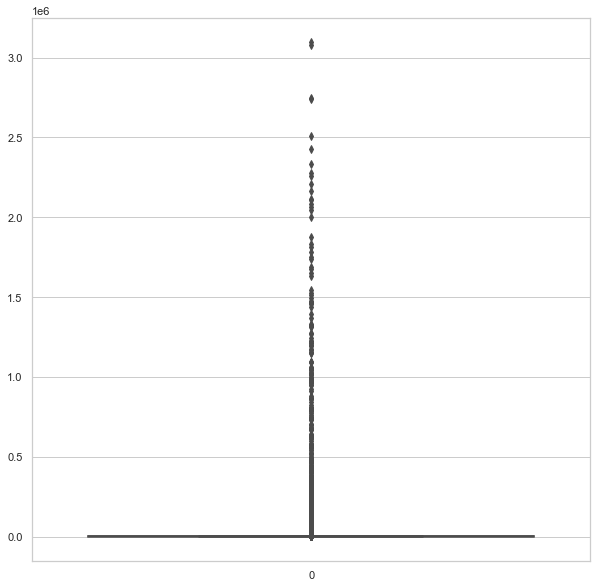

In [110]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize = (15,15))
sns.boxplot(data=citi_data['tripduration'])
fig=plt.gcf()
fig.set_size_inches(10,10)

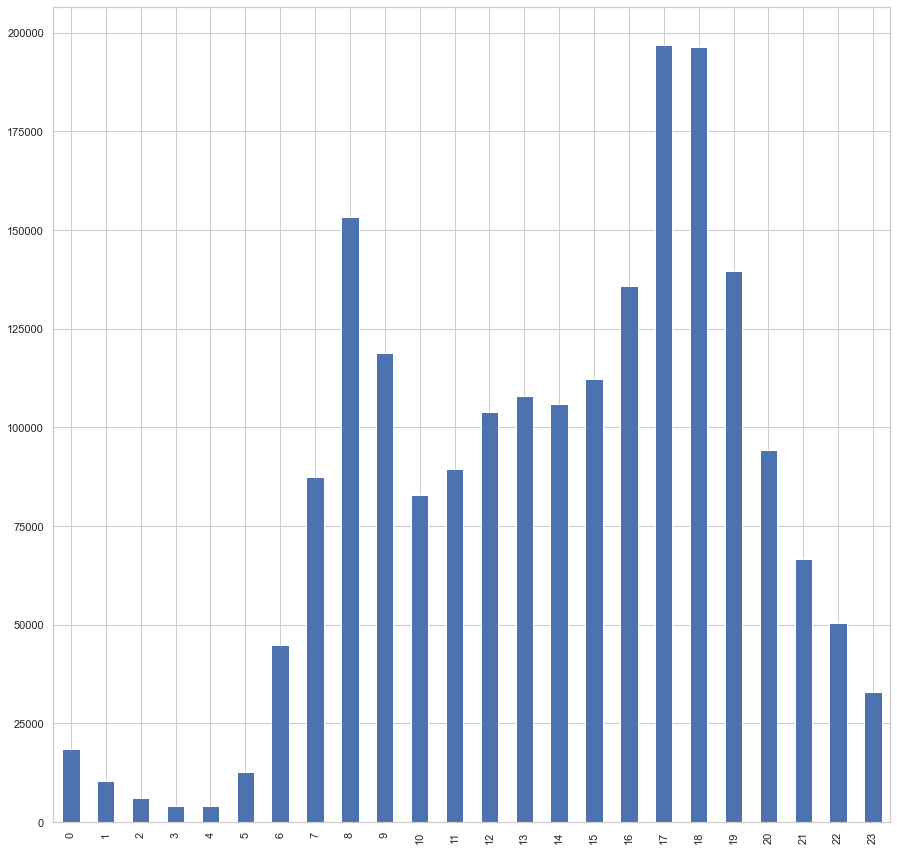

In [111]:
#Counting riders hourly
day=range(0,24)
count_of_rides_hourly = citi_data['Start_hour'].value_counts().reindex(day, fill_value=0)
plt.figure(figsize = (15,15))
count_of_rides_hourly.plot(kind='bar')
#print(count_of_rides_hourly)

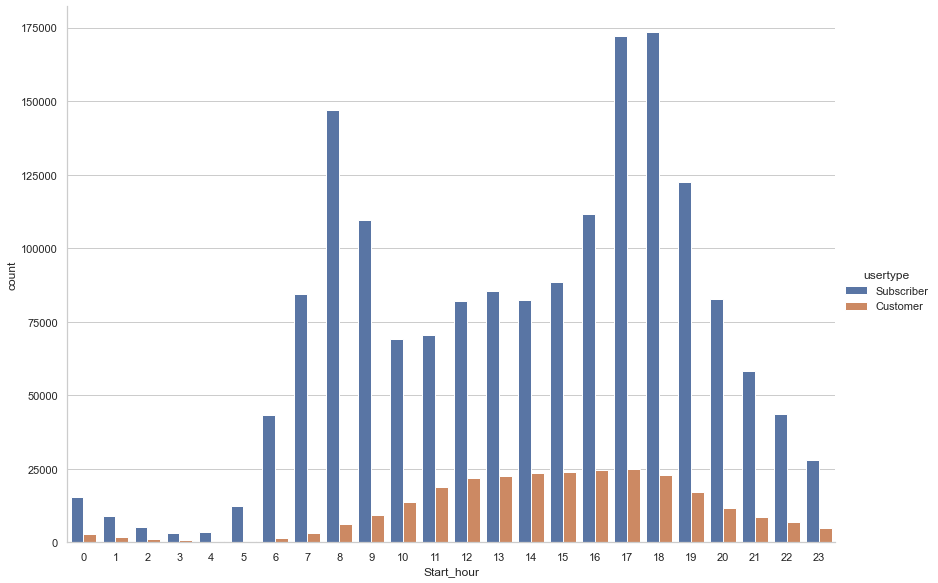

In [112]:
#Counting riders hourly
hour = range(0,24)

g = sns.catplot("Start_hour", 
                 hue="usertype",
                 data=citi_data, kind="count",order = hour, height=8.27, aspect=11.7/8.27);

The patterns for Weekends are obvious from the following plot: there appears to be high demand between 10 a.m. and 7 p.m. for both subscriber and customer groups. On weekends, some Subscribers appear to be touring around New York.

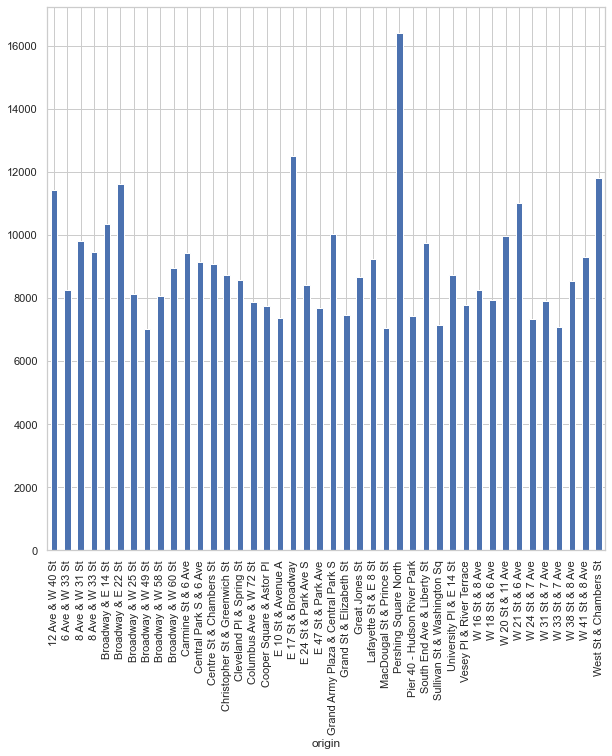

In [113]:
high_origin = citi_data.groupby(['origin']).size()

top_origin = high_origin[high_origin>7000]

plt.figure(figsize=(10,10))
top_origin.plot(kind='bar' )

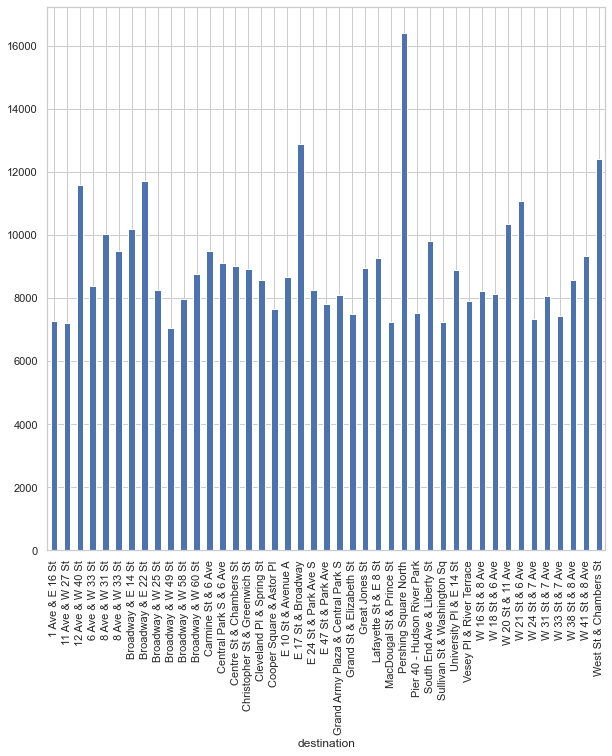

In [114]:
high_dest = citi_data.groupby(['destination']).size()

top_dest = high_dest[high_dest>7000]

plt.figure(figsize=(10,10))
top_dest.plot(kind='bar' )

In [115]:
types_users = citi_data['usertype'].value_counts()

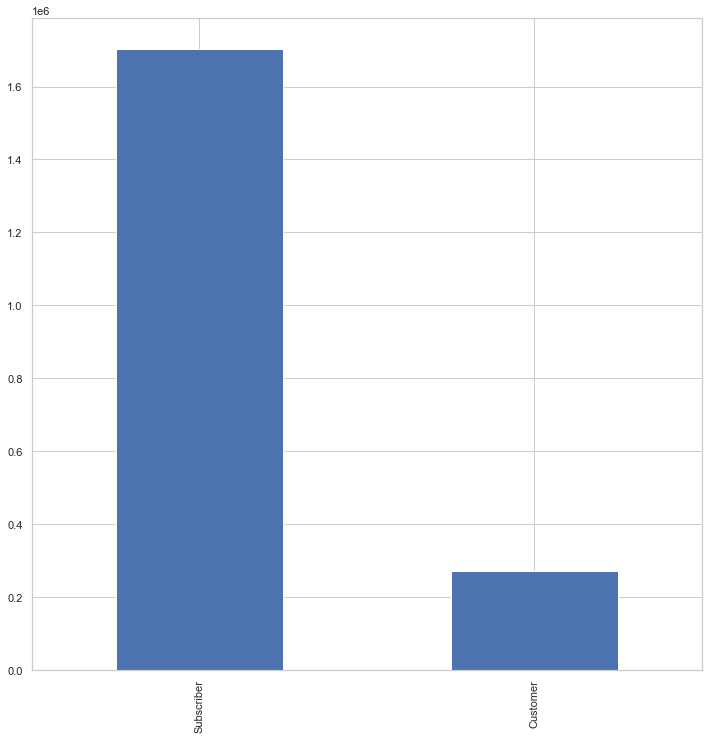

In [116]:
plt.figure(figsize=(12,12))
types_users.plot(kind='bar')

In [117]:
citi_data.shape

(1975789, 31)

In [118]:
#Dropping unknown gender values
citi_data.drop(citi_data[citi_data.gender == 0].index,inplace=True) 
citi_data.shape

(1770563, 31)

In [119]:
citi_data['age'] = 2018 - citi_data['birth_year'].astype(int)
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Minute,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,0,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,11,31,2,32
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,0,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,10,31,2,49
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,0,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,22,31,2,48
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,0,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,4,31,2,36
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,0,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,7,31,2,31


In [120]:
#Dropping high age values
citi_data.drop(citi_data[citi_data.age >70].index,inplace=True) 
citi_data.shape

(1759554, 32)

In [34]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [121]:
from geopy.distance import geodesic
from geopy.distance import great_circle
import math
from haversine import haversine


def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371/1.609 # miles
#Earth radius is the approximate distance from Earth's center to its surface, about 6,371 km (3,959 mi).
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
       * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d


#Calculating distance between origin and destination

dist = []
for i in range(len(citi_data)):
    dist.append(haversine((citi_data['origin_latitude'][i], citi_data['origin_longitude'][i]), (citi_data['dest_latitude'][i], citi_data['dest_longitude'][i])))


citi_data['Distance'] = dist

In [122]:
citi_data.shape

(1759554, 33)

In [123]:
origin_dest_same = citi_data[(citi_data['origin'] == citi_data['destination'])]
origin_dest_same.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
100,981,2018-08-01 00:09:16.350,2018-08-01 00:25:37.395,513.0,W 56 St & 10 Ave,40.768254,-73.988639,513.0,W 56 St & 10 Ave,40.768254,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,25,31,2,61,0.0
116,1161,2018-08-01 00:11:15.029,2018-08-01 00:30:36.353,3175.0,W 70 St & Amsterdam Ave,40.777480,-73.982886,3175.0,W 70 St & Amsterdam Ave,40.777480,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,30,31,2,38,0.0
279,949,2018-08-01 00:27:25.353,2018-08-01 00:43:15.214,3351.0,E 102 St & 1 Ave,40.786995,-73.941648,3351.0,E 102 St & 1 Ave,40.786995,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,43,31,2,26,0.0
388,2280,2018-08-01 00:38:53.036,2018-08-01 01:16:53.323,146.0,Hudson St & Reade St,40.716250,-74.009106,146.0,Hudson St & Reade St,40.716250,...,31,2,1,<bound method PandasDelegate._add_delegate_acc...,1,16,31,2,54,0.0
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,42,31,2,50,0.0


In [124]:
#Looking at data that has a calculated distance = 0 
circular = citi_data[(citi_data['Distance']==0.0) & (citi_data['tripduration']<120)]
print(circular.shape)
circular.head()

(3630, 33)


,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
399,106,2018-08-01 00:40:43.710,2018-08-01 00:42:30.388,324.0,DeKalb Ave & Hudson Ave,40.689888,-73.981013,324.0,DeKalb Ave & Hudson Ave,40.689888,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,42,31,2,50,0.0
717,113,2018-08-01 01:42:19.442,2018-08-01 01:44:13.242,483.0,E 12 St & 3 Ave,40.732233,-73.988900,483.0,E 12 St & 3 Ave,40.732233,...,31,2,1,<bound method PandasDelegate._add_delegate_acc...,1,44,31,2,21,0.0
1946,96,2018-08-01 06:23:18.721,2018-08-01 06:24:55.191,480.0,W 53 St & 10 Ave,40.766697,-73.990617,480.0,W 53 St & 10 Ave,40.766697,...,31,2,6,<bound method PandasDelegate._add_delegate_acc...,1,24,31,2,26,0.0
2095,92,2018-08-01 06:30:12.208,2018-08-01 06:31:45.171,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3494.0,E 115 St & Lexington Ave,40.797911,...,31,2,6,<bound method PandasDelegate._add_delegate_acc...,1,31,31,2,33,0.0
2206,96,2018-08-01 06:35:04.400,2018-08-01 06:36:40.965,127.0,Barrow St & Hudson St,40.731724,-74.006744,127.0,Barrow St & Hudson St,40.731724,...,31,2,6,<bound method PandasDelegate._add_delegate_acc...,1,36,31,2,28,0.0


In [125]:
#Dropping the circular trips 
citi_data = citi_data.drop(citi_data.index[(citi_data['Distance'] == 0.0) & (citi_data['tripduration']<120)])
citi_data.shape

(1755924, 33)

In [126]:
#statistical summary of distance
citi_data['Distance'].describe() 

count    1.755924e+06
mean     1.831653e+00
std      1.478032e+00
min      0.000000e+00
25%      8.314410e-01
50%      1.389319e+00
75%      2.362702e+00
max      1.819242e+01
Name: Distance, dtype: float64

In [127]:
citi_data[(citi_data['tripduration']>=3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)].shape 

(40929, 33)

In [128]:
citi_data.drop(citi_data.index[(citi_data['tripduration']>= 3600)|(citi_data['tripduration']<=120)|(citi_data['Distance']>10)],inplace=True)
citi_data.shape

(1714995, 33)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


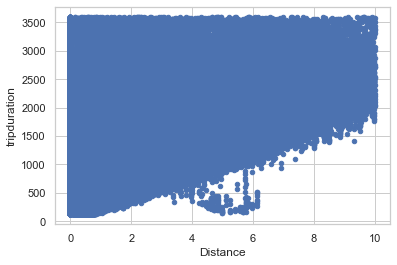

In [129]:
#Checking if there is any relation between distance and trip duration
citi_data.plot.scatter('Distance','tripduration') 

In [130]:
citi_data.head()

,tripduration,starttime,stoptime,origin_id,origin,origin_latitude,origin_longitude,dest_id,destination,dest_latitude,...,Start_Week,Start_weekday,Stop_hour,Stop_Dayofweek,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance
0,681,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,11,31,2,32,2.594850
1,625,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,10,31,2,49,2.164037
2,1319,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,22,31,2,48,1.058240
3,220,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,4,31,2,36,0.595883
4,398,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,...,31,2,0,<bound method PandasDelegate._add_delegate_acc...,1,7,31,2,31,1.096288


There is definitely a pattern between distance and tripduration, but we do not see a very strong relationship.

We will now be computing speed of bike based on the computed distance and time information that we have. We are trying t determine if factors such as gender and age affect the speed of the rider and therefore the tripduration.

In [131]:
#Add Minutes column for Trip Duration
citi_data['Minutes'] = citi_data['tripduration']/60
#For Visual purposes, rounded
citi_data['Minutes'] = round(citi_data['Minutes'])
citi_data['Minutes'] = citi_data['Minutes'].astype(int)

In [132]:
citi_data['min_mile'] = round((citi_data['Minutes']/citi_data['Distance']), 2)
citi_data['mile_hour'] = round(citi_data['Distance']/(citi_data['Minutes']/60),2)

Linear Regression to estimate future trip duration that will help Citi Bike plan their resources better

In [133]:
citi_data.columns.values

array(['tripduration', 'starttime', 'stoptime', 'origin_id', 'origin',
       'origin_latitude', 'origin_longitude', 'dest_id', 'destination',
       'dest_latitude', 'dest_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'start_date', 'start_time', 'stop_date',
       'stop_time', 'Start_hour', 'Start_Dayofweek', 'Start_Day',
       'Start_Minute', 'Start_Week', 'Start_weekday', 'Stop_hour',
       'Stop_Dayofweek', 'Stop_Day', 'Stop_Minute', 'Stop_Week',
       'Stop_weekday', 'age', 'Distance', 'Minutes', 'min_mile',
       'mile_hour'], dtype=object)

In [134]:
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
citi_data['Weekday']=citi_data['Start_Dayofweek'].apply(lambda x: 1 if x in Weekday else 0)
morning = range(0,11);afternoon = [12,13,14,15,16,17];evening = range(18,23)
print("morning:",morning,"afternoon:",afternoon,"evening:",evening)


morning: range(0, 11) afternoon: [12, 13, 14, 15, 16, 17] evening: range(18, 23)


In [135]:
citi_data.shape

(1714995, 37)

In [136]:
citi_data.describe()

,tripduration,origin_id,origin_latitude,origin_longitude,dest_id,dest_latitude,dest_longitude,bikeid,birth_year,gender,...,Stop_Day,Stop_Minute,Stop_Week,Stop_weekday,age,Distance,Minutes,min_mile,mile_hour,Weekday
count,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,...,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1.714995e+06,1714995.00,1.714995e+06,1714995.0
mean,7.815420e+02,1.609212e+03,4.073701e+01,-7.398247e+01,1.602778e+03,4.073667e+01,-7.398260e+01,2.630168e+04,1.981042e+03,1.269674e+00,...,1.624489e+01,2.982246e+01,3.305969e+01,2.830299e+00,3.695848e+01,1.844363e+00,1.302458e+01,inf,9.097632e+00,0.0
std,5.670038e+02,1.448379e+03,3.038211e-02,1.951181e-02,1.448463e+03,3.023263e-02,1.963101e-02,6.208572e+03,1.125545e+01,4.437907e-01,...,8.998928e+00,1.741114e+01,1.323525e+00,1.829077e+00,1.125545e+01,1.439864e+00,9.455820e+00,NaN,3.229525e+00,0.0
min,1.210000e+02,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406378e+01,1.452900e+04,1.948000e+03,1.000000e+00,...,1.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,1.600000e+01,0.000000e+00,2.000000e+00,0.40,0.000000e+00,0.0
25%,3.690000e+02,3.820000e+02,4.071755e+01,-7.399548e+01,3.800000e+02,4.071755e+01,-7.399596e+01,2.009400e+04,1.974000e+03,1.000000e+00,...,8.000000e+00,1.500000e+01,3.200000e+01,1.000000e+00,2.800000e+01,8.571249e-01,6.000000e+00,5.42,7.340000e+00,0.0
50%,6.060000e+02,5.080000e+02,4.073756e+01,-7.398584e+01,5.070000e+02,4.073705e+01,-7.398632e+01,2.785200e+04,1.984000e+03,1.000000e+00,...,1.600000e+01,3.000000e+01,3.300000e+01,3.000000e+00,3.400000e+01,1.409749e+00,1.000000e+01,6.53,9.180000e+00,0.0
75%,1.031000e+03,3.258000e+03,4.075725e+01,-7.397208e+01,3.258000e+03,4.075660e+01,-7.397210e+01,3.157300e+04,1.990000e+03,2.000000e+00,...,2.400000e+01,4.500000e+01,3.400000e+01,4.000000e+00,4.400000e+01,2.377337e+00,1.700000e+01,8.17,1.107000e+01,0.0
max,3.599000e+03,3.705000e+03,4.081439e+01,-7.390774e+01,3.705000e+03,4.081439e+01,-7.390774e+01,3.483900e+04,2.002000e+03,2.000000e+00,...,3.100000e+01,5.900000e+01,3.500000e+01,6.000000e+00,7.000000e+01,9.996986e+00,6.000000e+01,inf,1.497200e+02,0.0


In [137]:
df = citi_data.iloc[:,[32,12,14,0,36]]
df.head()

,Distance,usertype,gender,tripduration,Weekday
0,2.594850,Subscriber,1,681,0
1,2.164037,Subscriber,1,625,0
2,1.058240,Subscriber,1,1319,0
3,0.595883,Subscriber,1,220,0
4,1.096288,Subscriber,1,398,0


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
import sys

In [139]:
#Using Stat Models for Linear Regression
lm1 = smf.ols(formula='tripduration ~ Distance+C(usertype)+C(gender)+C(Weekday)', data=df).fit()

# print the coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                 7.177e+05
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:59:29   Log-Likelihood:            -1.2610e+07
No. Observations:             1714995   AIC:                         2.522e+07
Df Residuals:                 1714991   BIC:                         2.522e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   633.8141      1.315    482.013      0.000     631.237     636.391
C(usertype)[T.Subscriber]  -415.6203      1.264   -328.766      0.000    -418.098    -413.143
C(gender)[T.2]               75.9875      0.651    116.769      0.000      74.712      77.263
Distance                    281.8742      0.200   1406.328      0.000     281.481     282.267
==============================================================================
Omnibus:                  1137204.052   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15857993.179
Skew:                           3.065   Prob(JB):                         0.00
Kurtosis:                      16.577   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#Creating dummy variables
for column in df.columns:
     if df[column].dtype==object:
        dummyCols=pd.get_dummies(df[column])
        df=df.join(dummyCols)
        del df[column]

In [143]:
#Creating a LinearRegression object
model = LinearRegression()
#Removing target for testing if predictions are accurate
Y = df.pop('tripduration')
#Creating a sparse matrix with current observations
X = df.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [144]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1371996, 5) (1371996,)
(342999, 5) (342999,)


In [145]:
#Fitting the model using linear regression
dur = model.fit(x_train, y_train)
#Predicting for unseen test examples
dur_pred = model.predict(x_test)

In [146]:
#print the coefficients
print(dur.intercept_)
print(dur.coef_)


349.9553777994
[ 281.86061357   75.91745976    0.          207.74470038 -207.74470038]


In [147]:
#Making coefficients readable
coefficients=pd.DataFrame({'name':list(df),'value':dur.coef_})
coefficients

,name,value
0,Distance,281.860614
1,gender,75.917460
2,Weekday,0.000000
3,Customer,207.744700
4,Subscriber,-207.744700


In [148]:
#Looking at the R-squared value for the regression
print("R²:",dur.score(x_test,y_test))

R²: 0.5555570023516143


In [149]:
subscriber_data = citi_data[citi_data['usertype'] == 'Subscriber']
origin_undocked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'origin_id', 'origin']).size().reset_index(name='outflow')
docked_outflow = origin_undocked.sort_values(['outflow'], ascending=False).head(10)
docked_outflow

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow
239970,17,28,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,166
239305,17,27,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,164
236676,17,23,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,159
236009,17,22,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,158
255515,18,21,<bound method PandasDelegate._add_delegate_acc...,402.0,Broadway & E 22 St,151
227179,17,8,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,150
240603,17,29,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,147
225867,17,6,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,144
235214,17,21,<bound method PandasDelegate._add_delegate_acc...,359.0,E 47 St & Park Ave,142
234676,17,20,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,142


In [150]:
dest_docked = subscriber_data.groupby(['Start_hour', 'Start_Day','Start_Dayofweek', 'dest_id', 'destination']).size().reset_index(name='inflow')
docked_inflow = dest_docked.sort_values(['inflow'], ascending=False).head(10)
docked_inflow

,Start_hour,Start_Day,Start_Dayofweek,dest_id,destination,inflow
235318,17,28,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,152
234627,17,27,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,139
229857,17,20,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,137
222053,17,8,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,136
220691,17,6,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,135
218051,17,2,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,130
231247,17,22,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,128
236004,17,29,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,126
68249,8,21,<bound method PandasDelegate._add_delegate_acc...,359.0,E 47 St & Park Ave,125
227268,17,16,<bound method PandasDelegate._add_delegate_acc...,519.0,Pershing Square North,119


In [151]:
station_load = pd.merge(origin_undocked, dest_docked, left_on = ['origin_id','Start_hour','Start_Day','Start_Dayofweek'], 
                        right_on = ['dest_id','Start_hour','Start_Day','Start_Dayofweek'])
station_load.shape

(276446, 9)

In [152]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow
0,0,1,<bound method PandasDelegate._add_delegate_acc...,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1
1,0,1,<bound method PandasDelegate._add_delegate_acc...,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1
2,0,1,<bound method PandasDelegate._add_delegate_acc...,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2
3,0,1,<bound method PandasDelegate._add_delegate_acc...,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1
4,0,1,<bound method PandasDelegate._add_delegate_acc...,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1


In [153]:
station_load['load'] = station_load['inflow'] - station_load['outflow']

In [154]:
station_load.head(10)

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
0,0,1,<bound method PandasDelegate._add_delegate_acc...,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1
1,0,1,<bound method PandasDelegate._add_delegate_acc...,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0
2,0,1,<bound method PandasDelegate._add_delegate_acc...,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2,0
3,0,1,<bound method PandasDelegate._add_delegate_acc...,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2
4,0,1,<bound method PandasDelegate._add_delegate_acc...,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0
5,0,1,<bound method PandasDelegate._add_delegate_acc...,173.0,Broadway & W 49 St,1,173.0,Broadway & W 49 St,1,0
6,0,1,<bound method PandasDelegate._add_delegate_acc...,223.0,W 13 St & 7 Ave,3,223.0,W 13 St & 7 Ave,2,-1
7,0,1,<bound method PandasDelegate._add_delegate_acc...,228.0,E 48 St & 3 Ave,2,228.0,E 48 St & 3 Ave,1,-1
8,0,1,<bound method PandasDelegate._add_delegate_acc...,229.0,Great Jones St,2,229.0,Great Jones St,1,-1
9,0,1,<bound method PandasDelegate._add_delegate_acc...,236.0,St Marks Pl & 2 Ave,5,236.0,St Marks Pl & 2 Ave,3,-2


In [155]:
station_load.sort_values(['load'],ascending=True)

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load
183463,17,20,<bound method PandasDelegate._add_delegate_acc...,359.0,E 47 St & Park Ave,141,359.0,E 47 St & Park Ave,18,-123
20714,6,29,<bound method PandasDelegate._add_delegate_acc...,3255.0,8 Ave & W 31 St,138,3255.0,8 Ave & W 31 St,15,-123
177241,17,9,<bound method PandasDelegate._add_delegate_acc...,359.0,E 47 St & Park Ave,135,359.0,E 47 St & Park Ave,13,-122
184094,17,21,<bound method PandasDelegate._add_delegate_acc...,359.0,E 47 St & Park Ave,142,359.0,E 47 St & Park Ave,20,-122
185483,17,23,<bound method PandasDelegate._add_delegate_acc...,520.0,W 52 St & 5 Ave,128,520.0,W 52 St & 5 Ave,10,-118
...,...,...,...,...,...,...,...,...,...,...
45181,8,23,<bound method PandasDelegate._add_delegate_acc...,359.0,E 47 St & Park Ave,27,359.0,E 47 St & Park Ave,117,90
180795,17,15,<bound method PandasDelegate._add_delegate_acc...,3255.0,8 Ave & W 31 St,24,3255.0,8 Ave & W 31 St,114,90
171566,16,30,<bound method PandasDelegate._add_delegate_acc...,3255.0,8 Ave & W 31 St,10,3255.0,8 Ave & W 31 St,102,92
176268,17,7,<bound method PandasDelegate._add_delegate_acc...,3255.0,8 Ave & W 31 St,22,3255.0,8 Ave & W 31 St,115,93


In [156]:
station_8_W31 = station_load.loc[station_load['origin_id'] == 3255]
station_8_W31 = station_8_W31.loc[~station_load['Start_Dayofweek'].isin(('Saturday','Sunday'))]
station_8_W31.shape

(623, 10)

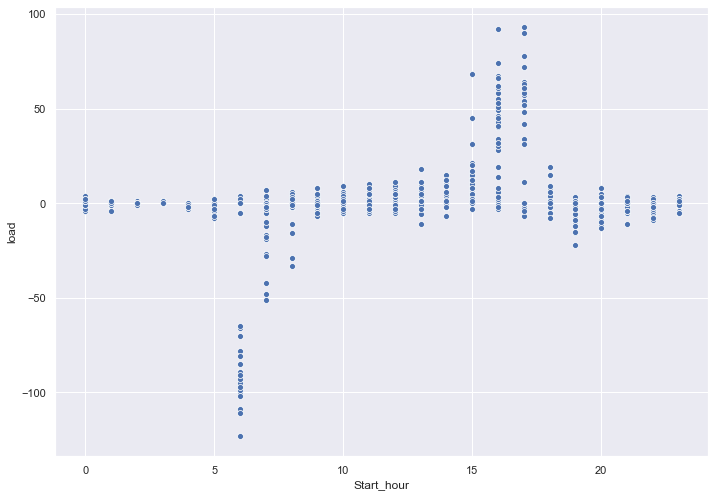

In [193]:
#station_load = sns.load_dataset("station_load")
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})

l = sns.scatterplot(x = 'Start_hour',y = 'load',data=station_8_W31)

When monitoring morning and evening peak hours, the usage pattern reveals that inflow and outflow patterns have an inverse connection.

This also explains why commuters use the same starting and ending sites, such as Penn Station in the morning and Penn Station in the evening.

Let's look at the peak-hours visualization map

In [157]:
import folium

folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

folium.CircleMarker(location=[40.738, -73.98],fill=True).add_to(folium_map)
#folium_map

In [158]:
citi_data["starttime"] = pd.to_datetime(citi_data["starttime"])
citi_data["stoptime"] = pd.to_datetime(citi_data["stoptime"])
citi_data["hour"] = citi_data["starttime"].map(lambda x: x.hour)

In [159]:
def get_trip_counts_by_hour(selected_hour):
    # make a DataFrame with locations for each bike station
    locations = citi_data.groupby("origin_id").first()
    locations = locations.loc[:, ["origin_latitude",
                                 "origin_longitude",
                                 "origin"]]
    
    #select one time of day
    subset = citi_data[citi_data["hour"]==selected_hour]
    
    # count trips for each destination
    departure_counts =  subset.groupby("origin_id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departure Count"]
    
    # count trips for each origin
    arrival_counts =  subset.groupby("dest_id").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]

    #join departure counts, arrival counts, and locations
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

# print a sample to check our code works
get_trip_counts_by_hour(5).head(5)

,Departure Count,origin_latitude,origin_longitude,origin,Arrival Count
origin_id,,,,,
72.0,50,40.767272,-73.993929,W 52 St & 11 Ave,9.0
79.0,7,40.719116,-74.006667,Franklin St & W Broadway,15.0
82.0,3,40.711174,-74.000165,St James Pl & Pearl St,7.0
83.0,1,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,26.0
119.0,13,40.696089,-73.978034,Park Ave & St Edwards St,1.0


In [160]:
def plot_station_counts(trip_counts):
    # generate a new map
    folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=13,
                            tiles="CartoDB dark_matter",
                            width='50%')

    # for each row in the data, add a cicle marker
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = (row["Departure Count"]-row["Arrival Count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total arrival: {}<br> total departure: {}<br> net departure: {}"
        popup_text = popup_text.format(row["origin"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)
        
        # radius of circles
        radius = net_departures/20
        
        # choose the color of the marker
        if net_departures>0:
            
            color="#E37222" # tangerine
        else:
                     
             color="#0A8A9F" # teal
        
        # add marker to the map
        folium.CircleMarker(location=(row["origin_latitude"],
                                      row["origin_longitude"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

In [161]:
station_load['load'].describe()

count    276446.000000
mean          0.022323
std           5.292010
min        -123.000000
25%          -2.000000
50%           0.000000
75%           2.000000
max          95.000000
Name: load, dtype: float64

In [162]:
def label_load(row):

    if row['inflow'] <= 2 and row['outflow'] <= 2:
        return 'idle'
    elif row['load'] <= -30:
        return 'high outflow'
#     elif -30 < row['load'] < -10:
#         return 'low outflow'
    elif -30 <= row['load'] < 0:
        return 'low outlow'
    elif 0 < row['load'] <= 30:
        return 'low inflow'
#     elif 10 < row['load'] <= 30 :
#         return 'low inflow'
    elif row['load'] > 30:
        return 'high inflow'
    else:
        return 'load balanced'

In [163]:
station_load['label'] = station_load.apply(lambda row: label_load(row),axis = 1)
labels = station_load.groupby('label')['load'].size()
labels

label
high inflow        416
high outflow       515
idle             69578
load balanced    18666
low inflow       94663
low outlow       92608
Name: load, dtype: int64

In [164]:
station_load = station_load[~station_load.label.isin(['high inflow', 'high outflow', 'load balanced'])]
station_load = station_load[~station_load.Start_Dayofweek.isin(['Saturday', 'Sunday'])] #Interested in weekday commuters

In [165]:
labels = station_load.groupby('label')['load'].size()
labels

label
idle          69578
low inflow    94663
low outlow    92608
Name: load, dtype: int64

In [166]:
station_load.head()

,Start_hour,Start_Day,Start_Dayofweek,origin_id,origin,outflow,dest_id,destination,inflow,load,label
0,0,1,<bound method PandasDelegate._add_delegate_acc...,72.0,W 52 St & 11 Ave,2,72.0,W 52 St & 11 Ave,1,-1,idle
1,0,1,<bound method PandasDelegate._add_delegate_acc...,120.0,Lexington Ave & Classon Ave,1,120.0,Lexington Ave & Classon Ave,1,0,idle
2,0,1,<bound method PandasDelegate._add_delegate_acc...,146.0,Hudson St & Reade St,2,146.0,Hudson St & Reade St,2,0,idle
3,0,1,<bound method PandasDelegate._add_delegate_acc...,157.0,Henry St & Atlantic Ave,3,157.0,Henry St & Atlantic Ave,1,-2,low outlow
4,0,1,<bound method PandasDelegate._add_delegate_acc...,168.0,W 18 St & 6 Ave,1,168.0,W 18 St & 6 Ave,1,0,idle


In [167]:
station_load_cpy = pd.DataFrame(station_load)

In [168]:
station_load.drop(station_load.columns[[1,4,5,6,7,8,9]],axis=1,inplace=True)

station_load.head()

,Start_hour,Start_Dayofweek,origin_id,label
0,0,<bound method PandasDelegate._add_delegate_acc...,72.0,idle
1,0,<bound method PandasDelegate._add_delegate_acc...,120.0,idle
2,0,<bound method PandasDelegate._add_delegate_acc...,146.0,idle
3,0,<bound method PandasDelegate._add_delegate_acc...,157.0,low outlow
4,0,<bound method PandasDelegate._add_delegate_acc...,168.0,idle


In [169]:
from sklearn.preprocessing import LabelEncoder#Creating dummy variables
station_load = pd.get_dummies(station_load, columns=['Start_hour', 'Start_Dayofweek', 'origin_id'])
station_load

,label,Start_hour_0,Start_hour_1,Start_hour_2,Start_hour_3,Start_hour_4,Start_hour_5,Start_hour_6,Start_hour_7,Start_hour_8,...,origin_id_3690.0,origin_id_3691.0,origin_id_3692.0,origin_id_3693.0,origin_id_3695.0,origin_id_3697.0,origin_id_3699.0,origin_id_3700.0,origin_id_3701.0,origin_id_3705.0
0,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,low outlow,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,idle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276440,idle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276441,idle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276442,low outlow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276443,idle,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [170]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = station_load

# y is a vector, hence we use dot to access 'label'
y = station_load.label

In [171]:
# split X and y into training and testing sets
Y = station_load.pop('label')
#Creating a sparse matrix with current observations
X = station_load.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [172]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(multi_class='ovr',solver = 'newton-cg')

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='newton-cg')

In [173]:
y_pred_class = logreg.predict(X_test)

In [174]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.5092661086237104


In [175]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

low inflow    18969
low outlow    18513
idle          13888
Name: label, dtype: int64

In [176]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
metrics.confusion_matrix(y_test, y_pred_class)

array([[9537, 2316, 2035],
       [3144, 9259, 6566],
       [3110, 8038, 7365]], dtype=int64)

# Decision Tree

In [177]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [178]:
y_pred_class = clf.predict(X_test)

In [179]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.6018687950165467


# Random Forest Classifier

In [180]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 20, criterion = 'entropy', max_depth= 300, min_samples_leaf= 2,
                                    min_samples_split= 2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Random Forest:",accuracy_score(y_test, y_pred))

Random Forest: 0.5829083122445007


# Naive Bayes' Classifier

In [183]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [184]:
y_pred = gnb.predict(X_test)

y_pred

array(['low inflow', 'low outlow', 'low outlow', ..., 'low inflow',
       'low outlow', 'idle'], dtype='<U10')

In [185]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4596


CONCLUSION

Decision Tree = 60.18%
Random Forest Classifier = 58.29%
Naive Bayes Classifier = 45.96%
Linear Regression = 55.55%
Logistic Regression = 50.52%
